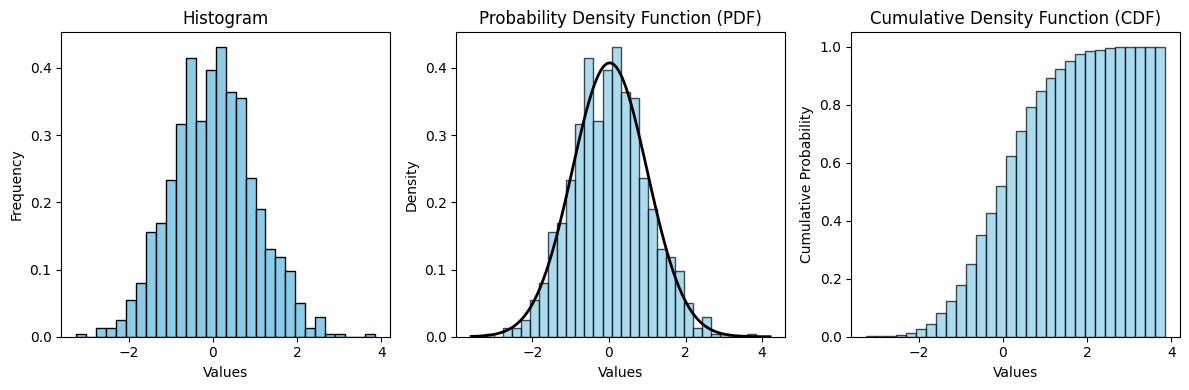

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate a random dataset
np.random.seed(42)
data = np.random.normal(size=1000)

# Plot Histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Plot Probability Density Function (PDF)
plt.subplot(1, 3, 2)
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Fit a normal distribution to the data
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Probability Density Function (PDF)')
plt.xlabel('Values')
plt.ylabel('Density')

# Plot Cumulative Density Function (CDF)
plt.subplot(1, 3, 3)
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black', cumulative=True, alpha=0.7)

plt.title('Cumulative Density Function (CDF)')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

mean: 43.002372
standard deviation 13.229146547438953


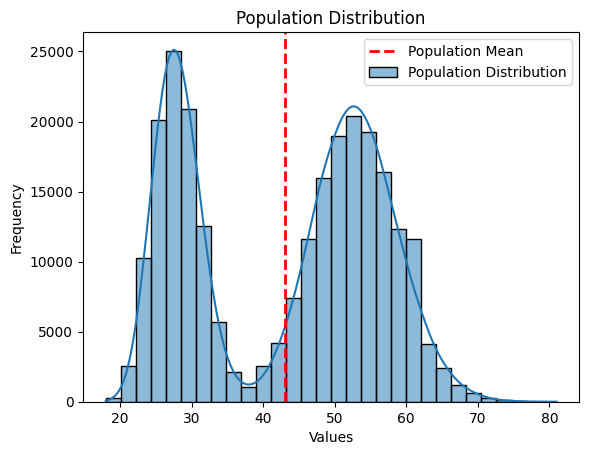

In [2]:
#Foundation Libraries
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as stats
import random
import math

#use random.seed(10) to set random values
np.random.seed(10)

# Population
pop_age1 = stats.poisson.rvs(loc=18, mu=35, size=150000) #loc=direction/where starts; mean=35; 150K
pop_age2 = stats.poisson.rvs(loc=18, mu=10, size=100000) #loc=direction/where starts; mean=10; 100K
pop_ages = np.concatenate((pop_age1, pop_age2)) #join

result1 = pop_ages.mean() #mean of population
result2 = pop_ages.std() #standard deviation of population

#print results
print('mean:', result1)
print('standard deviation', result2)

# Plotting the distribution and the null hypothesis
sns.histplot(pop_ages, bins=30, kde=True, label='Population Distribution')
plt.axvline(x=np.mean(pop_ages), color='red', linestyle='dashed', linewidth=2, label='Population Mean')

plt.title('Population Distribution')
plt.xlabel('Values'); plt.ylabel('Frequency')
plt.legend()
plt.show()

True population mean: 43.002372
Sample population mean 42.378
Difference of: 0.624372000000001


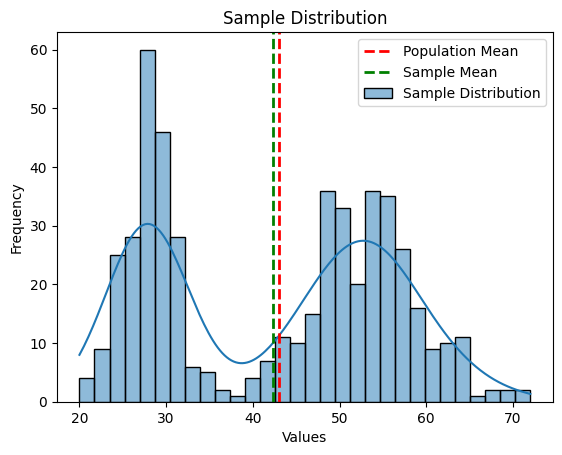

In [3]:
# Start with random data to compose the population
np.random.seed(10)
sample_ages = np.random.choice( a = pop_ages, size = 500)

print('True population mean:', result1)
print('Sample population mean', sample_ages.mean() )
print('Difference of:', result1 - sample_ages.mean())

# Plotting the distribution and the null hypothesis
sns.histplot(sample_ages, bins=30, kde=True, label='Sample Distribution')
plt.axvline(x=np.mean(pop_ages), color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.axvline(x=np.mean(sample_ages), color='green', linestyle='dashed', linewidth=2, label='Sample Mean')

plt.title('Sample Distribution')
plt.xlabel('Values'); plt.ylabel('Frequency')
plt.legend()
plt.show()

# Sampling Distributions and The Central Limit Theorem
- In fact, we can applying the Central Limit Theorem:For showing this, let’s take:

     - 200 samples from our population.
     - Make 200 point estimates of the sample mean.

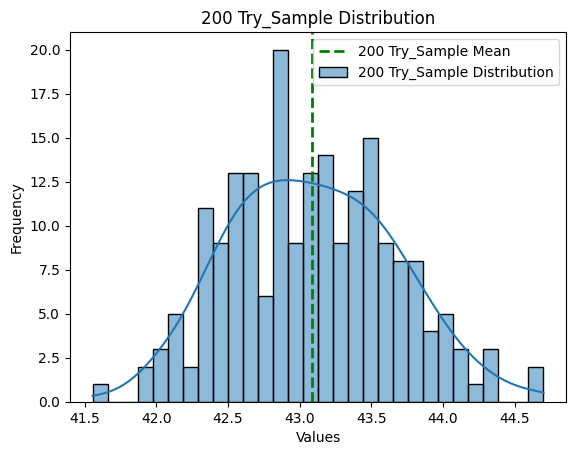

In [4]:
np.random.seed(10)

point_estimates = [] #List used as an storage for sampling mean

#for logic
for x in range(200): #Generate 200 samples
    # random.choice(a, size=None)
    # a = random sample generated from pop_ages sample
    # size of 500 hundred
    sample = np.random.choice(a = pop_ages, size = 500)
    point_estimates.append( sample.mean() )

#Create a data frame from point estimates list
#List is composed from samples.mean()
#Plot sample mean density
sns.histplot(point_estimates, bins=30, kde=True, label='200 Try_Sample Distribution')
plt.axvline(x=np.array(point_estimates).mean(), color='green', linestyle='dashed',
            linewidth=2, label='200 Try_Sample Mean')
plt.title('200 Try_Sample Distribution')
plt.xlabel('Values'); plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
#difference of true population mean and the average of the 200 estimates
#we use np.array because a 'list' object has no attribute 'mean'
pop_ages.mean() -  np.array(point_estimates).mean()

-0.08440799999999626

We are off .08 from the true population mean
Point estimates can give a rough idea of the population parameter such as: mean.
But estimates are prone to error.
Taking multiple samples are not viable.
It is not viable taking to 200 surveys of 500 people due to time and costs.
That’s why we usually work with Confidence Intervals.

In [6]:
# Z-test
np.random.seed(10)
sample_size = 1000
sample = np.random.choice(a = pop_ages, size = sample_size)
sample_mean = sample.mean()

# Z Critical Value (Two Tailed)
z_critical = stats.norm.ppf(1-.05/2)

print('Z-Critical Value:', z_critical )

Z-Critical Value: 1.959963984540054


In [7]:
# Confidence Intervals using the normal distribution (95% confidence interval)
conf_int = stats.norm.interval(confidence=0.95, loc=sample_mean, scale=stats.sem(sample))

print('Confidence Intervals are:', conf_int)

Confidence Intervals are: (41.690040474997915, 43.35595952500209)


In [8]:
# Standard error of the mean
standard_error = np.std(sample, ddof=1) / np.sqrt(sample_size)

# Margin of error
margin_of_error = z_critical * standard_error

# Confidence Intervals manually calculated
conf_int_lower = sample_mean - margin_of_error
conf_int_upper = sample_mean + margin_of_error

print('Z-Critical Value:', z_critical)
print('Confidence Intervals are:', (conf_int_lower, conf_int_upper))

Z-Critical Value: 1.959963984540054
Confidence Intervals are: (41.690040474997915, 43.35595952500209)


# T-Test
A T-distribution it is closely to a normal distribution but it gets wider when the sample is smaller.

In [9]:
np.random.seed(10)
sample_size_T = 27

sample_T = np.random.choice(a=pop_ages, size=sample_size_T)
sample_mean_T = sample_T.mean()
sample_std_T = sample_T.std(ddof=1)  # sample standard deviation

# Calculate sigma
sigma = sample_std_T / math.sqrt(sample_size_T)

# T-Critical value for a two-tailed test with alpha=0.05
T_critical = stats.t.ppf(q=0.975, df=sample_size_T - 1)  # df = degrees of freedom = sample size minus 1
print('T-Critical:', T_critical)

# Confidence Intervals
conf_int = stats.t.interval(confidence=0.95,  # Confidence level
                             df=sample_size_T - 1,  # Degrees of freedom
                             loc=sample_mean_T,  # Sample mean
                             scale=stats.sem(sample_T))  # Standard error of mean

print('Confidence Intervals:', conf_int)


T-Critical: 2.055529438642871
Confidence Intervals: (37.68972829149538, 47.939901338134256)


p-value

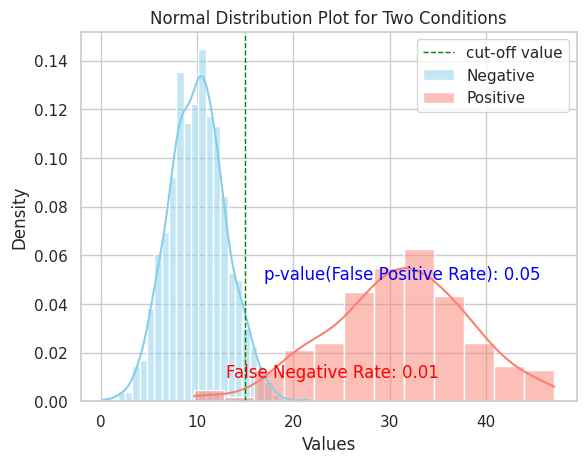

In [10]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Set the style for Seaborn
sns.set(style="whitegrid")

# Generate two sets of data (two conditions)
np.random.seed(42)
condition_1 = np.random.normal(loc=10, scale=3, size=1000)
condition_2 = np.random.normal(loc=30, scale=7, size=200)

cutoff = 15

# Calculate CDF values for Condition 1 and Condition 2 up to the cutoff value
cdf_condition1 = stats.norm.cdf(cutoff, loc=np.mean(condition_1), scale=np.std(condition_1))
cdf_condition2 = stats.norm.cdf(cutoff, loc=np.mean(condition_2), scale=np.std(condition_2))

# Plot for Condition 1/2
sns.histplot(condition_1, kde=True, color='skyblue', label='Negative', stat='density')
sns.histplot(condition_2, kde=True, color='salmon', label='Positive', stat='density')

# Display the p-value on condition_1
plt.text(cutoff+2, 0.05, f'p-value(False Positive Rate): {(1-cdf_condition1):.2f}', color='blue')
plt.axvline(x=cutoff, color='green', linestyle='dashed', linewidth=1, label='cut-off value')
# Display the p-value on condition_2
plt.text(cutoff-2, 0.01, f'False Negative Rate: {(cdf_condition2):.2f}', color='red')

plt.title('Normal Distribution Plot for Two Conditions')
plt.xlabel('Values'); plt.ylabel('Density')
plt.legend()
plt.show()
